In [119]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse
import pandas as pd
import lxml
import numpy as np
import matplotlib.pyplot as plt
import re
from itertools import cycle

In [120]:
data = pd.read_csv("gap.tsv", sep='\t')
data

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


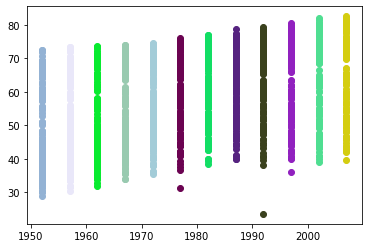

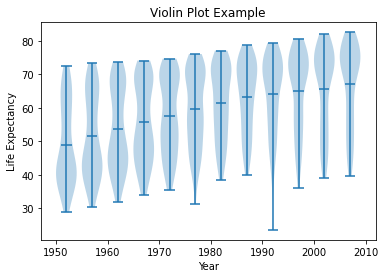

In [169]:
colors = np.random.rand(len(data['year'].unique()),3)
life_expentency = data.groupby('year')['lifeExp'].apply(list).reset_index(name='lifeExp')

year_color = {}
year_life_exp = {}
i = 0
for x in data['year'].unique():
    year_color[x] = colors[i] 
    i+=1


# year_color

    # plt.scatter(life_expentency['year'][i].astype(int), life_expentency['lifeExp'][i])
for index, i in enumerate(life_expentency['year']):

    # print(index)
    for j in life_expentency['lifeExp'][index]:
        plt.scatter(i, j, color= colors[index])
        # print(j)

   
plt.show()




plt.violinplot(life_expentency['lifeExp'],life_expentency['year'],widths=4,showmeans=True)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Violin Plot Example")
plt.savefig("violin.png")